<a href="https://colab.research.google.com/github/Sr-Elberth/InmersionAluraLatamDatos/blob/main/Solucion_Ejercisio_2_InmersionDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preparación del entorno y los datos**

In [ ]:
from google.colab import drive #Importa nuestra cuenta de Google

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #Importa panda

inmuebles = pd.read_csv('/content/drive/MyDrive/2 Inmersion de Datos Alura/inmuebles_bogota.csv') #Importa datos
inmuebles.head(3) #Muestra los primeros 3 datos

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000


In [ ]:
inmuebles.columns #Muestra el nombre de las columnas

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [ ]:
columnas = {'Baños':'Banos', 'Área':'Area'} #Crear diccionario
inmuebles = inmuebles.rename(columns=columnas) #Remplaza nombre de columnas
inmuebles.sample(3) #Muestra de 3

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
1464,Apartamento,Apartamento en venta en Usaquén,3,1,52,Usaquén,Usaquén,$ 192.500.000
8411,Apartamento,Apartamento en venta en Suba,3,2,93,Suba,Suba,$ 410.000.000
1830,Casa,Casa en venta en Kennedy,3,2,57,Kennedy,Kennedy Central,$ 160.000.000


In [ ]:
inmuebles.Valor[:3] #La columna Valor es de tipo String

0      $ 360.000.000
1      $ 670.000.000
2    $ 1.120.000.000
Name: Valor, dtype: object

In [ ]:
inmuebles.Valor[0].split()# Divide el simbolo $ de los numeros

['$', '360.000.000']

In [ ]:
inmuebles.Valor.str.split() #Devuelve una series panda

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [ ]:
inmuebles.Valor.str.split(expand=True)#Devuelve DataFrame devidido en 2 columnas

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [ ]:
valor = inmuebles.Valor.str.split(expand=True) #Guarda DataFrame
inmuebles['Moneda'] = valor[0] #Agrega columna "Moneda"
inmuebles['Precio'] =valor[1] #Agrega columna "Precio"
inmuebles.sample(3) #Muestra las nuevas columnas

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
2646,Apartamento,Apartamento en venta en Bosa,4,5,344,Bosa,Bosa Central,$ 2.850.000.000,$,2.850.000.000
4695,Casa,Casa en venta en Fontibón,4,4,155,Fontibón,Fontibón,$ 770.000.000,$,770.000.000
6071,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,106,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 545.000.000,$,545.000.000


In [ ]:
inmuebles.info() #Mostra el tipo de datos de las ultimas columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [ ]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) #Elimina los puntos

In [ ]:
inmuebles[['Precio', 'Barrio']] #Columna Precion sin '.'

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [ ]:
inmuebles.info() #Todavia, 'Precio' es un objecto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [ ]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000 
#Convierte a float y divide por 1 millon
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [ ]:
pd.set_option('display.precision', 2) #la precision de 2 cifras decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


**Primer grafico**

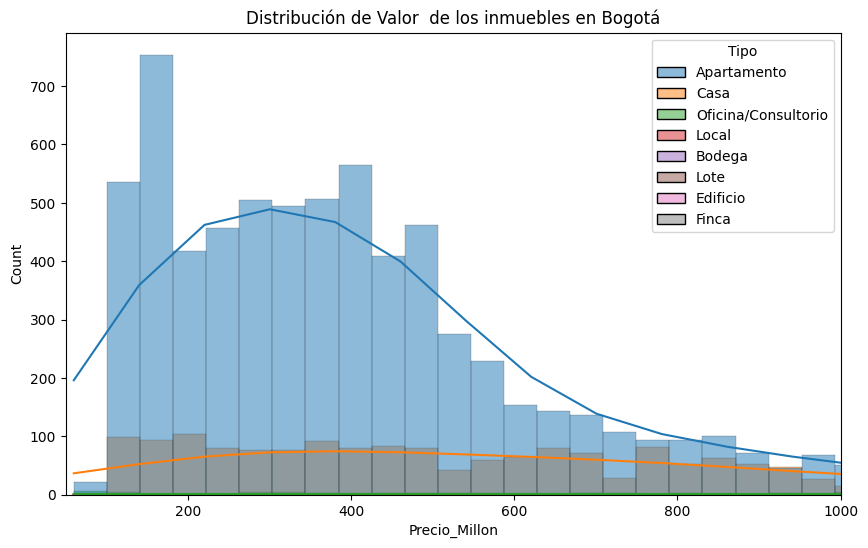

In [ ]:
import matplotlib.pyplot as plt # importa matplotlib
import seaborn as sns # importa seabor

plt.figure(figsize=(10,6)) # liezo en 2d preparado | (ancho, altura)
grafica =  sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo') 
grafica.set_title('Distribución de Valor  de los inmuebles en Bogotá')
plt.xlim((50,1000)) #limite min y max
#plt.ylim((0,20))
plt.savefig('/content/drive/MyDrive/2 Inmersion de Datos Alura/Clase 2/valor_inmuebles.png',format='png')
plt.show() #Muestra el histograma


**Desafíos**

1.Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles: *apartamentos, casas y fincas* (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2.Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

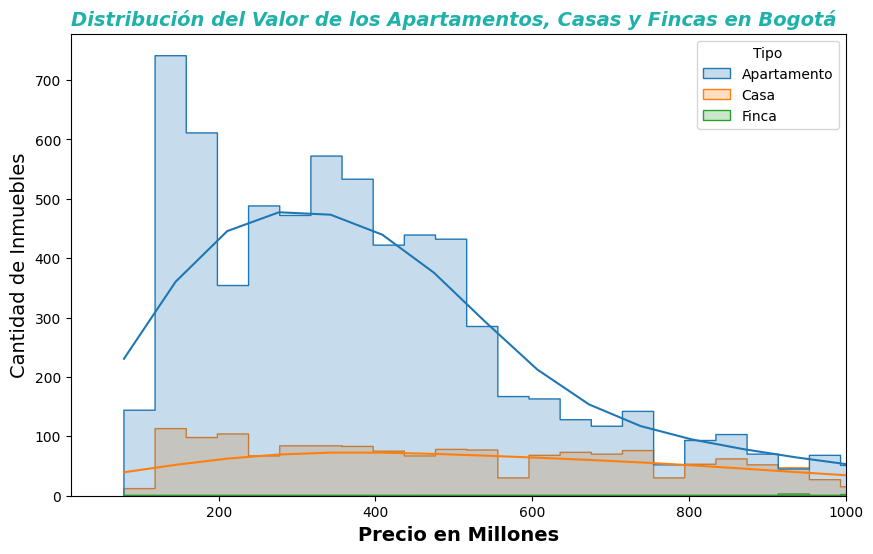

In [ ]:
#Desafio 1
inmuebles_filtrados = inmuebles.loc[inmuebles.Tipo.isin(['Apartamento', 'Casa', 'Finca'])]
plt.figure(figsize=(10,6)) # tamaño
grafica = sns.histplot(data=inmuebles_filtrados, x='Precio_Millon', kde=True, hue='Tipo', element="step")
grafica.set_title('Distribución del Valor de los Apartamentos, Casas y Fincas en Bogotá',loc="left", fontdict={'fontsize':14,
'fontweight':'bold','color': 'lightseagreen','fontstyle':'italic' })
grafica.set_xlabel("Precio en Millones", fontdict={'fontsize':14,
'fontweight':'bold' })
grafica.set_ylabel("Cantidad de Inmuebles", fontdict={'fontsize':14})
plt.xlim((11,1000))
plt.savefig('/content/drive/MyDrive/2 Inmersion de Datos Alura/Clase 2/valor_Aparts_Casas_Fincas.png',format='png')

Con los datos del grafico, se muestran que hay una gran cantidad de apartamentos disponibles a la venta con un rango de precios que van desde los 200 a 1000 millones.

Las fincas son los inmuebles que menos hay a la venta disponible

Las casas cuentan con un rango de precios de 60 hasta los 1000 millones de pesos colombianos




In [ ]:
#Desafio 2
inmuebles['Area'] = inmuebles.Area.astype('float')
precio_m2_barrios = inmuebles.groupby('Barrio')[['Precio_Millon','Area']].mean()
precio_m2_barrios['Precio_m2'] = precio_m2_barrios['Precio_Millon']/ precio_m2_barrios['Area']
precio_m2_barrios = precio_m2_barrios.sort_values('Precio_m2', ascending=False).reset_index()
precio_m2_barrios

,Barrio,Precio_Millon,Area,Precio_m2
0,Santa Ana,3172.50,309.38,10.25
1,El Virrey,931.67,93.83,9.93
2,La Candelaria,1544.23,173.72,8.89
3,La Merced,359.50,41.00,8.77
4,El Castillo,1137.50,134.25,8.47
...,...,...,...,...
144,Las Ferias,550.00,320.00,1.72
145,Libertador,1020.00,642.00,1.59
146,Roma,350.00,260.00,1.35
147,Bosa Piamonte,470.00,400.00,1.18


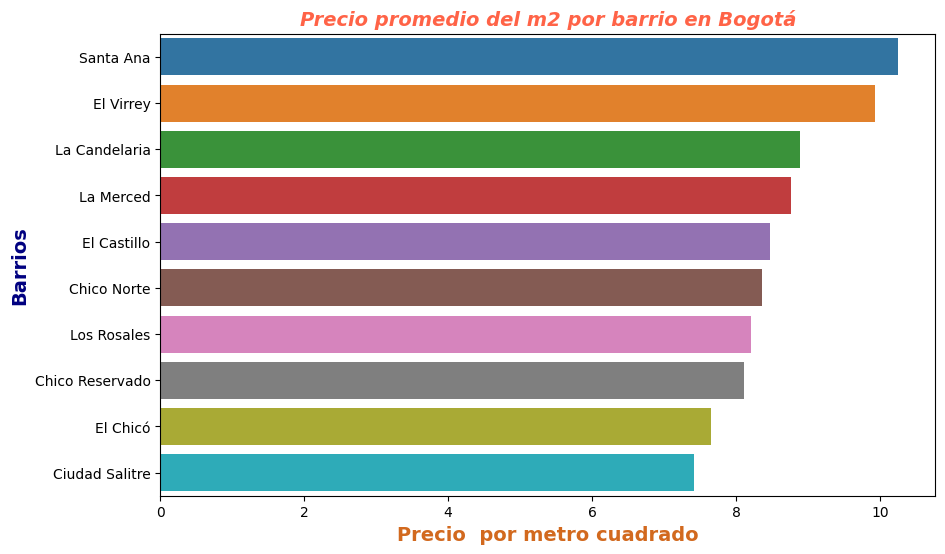

In [ ]:
plt.figure(figsize=(10,6)) # tamaño del grafico
sns.color_palette("viridis", as_cmap=True)
sns.barplot(data=precio_m2_barrios.head(10), x='Precio_m2', y='Barrio') #crear grafico con seaborn
plt.title("Precio promedio del m2 por barrio en Bogotá" ,loc="center", fontdict={'fontsize':14,
'fontweight':'bold','color': 'tomato','fontstyle':'italic'})
plt.xlabel("Precio  por metro cuadrado", fontdict={'fontsize':14,'fontweight':'bold','color': 'chocolate'})
plt.ylabel("Barrios", fontdict={'fontsize':14, 'fontweight':'bold','color':'navy'})
plt.savefig('/content/drive/MyDrive/2 Inmersion de Datos Alura/Clase 2/valor_m2_por_barrios.png',format='png')
